In [1]:
import pandas as pd
from pandas.core.frame import DataFrame
import numpy as np

census_xlsx = 'C:\Tito\Being Adult\Self Dev\BITS AIML course\FeatureEngineering\Census-1.xlsx'

census_df = pd.read_excel(io=census_xlsx,sheet_name='C-08')

census_df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45
0,Table,State,Distt.,Area Name,Total/,Age-group,Total,NaN,NaN,Illiterate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Name,Code,Code,NaN,Rural/,NaN,NaN,NaN,NaN,NaN,...,Technical diploma or certificate,NaN,NaN,Graduate & above,NaN,NaN,Unclassified,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,Urban/,NaN,NaN,NaN,NaN,NaN,...,not equal to degree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,Persons,Males,Females,Persons,...,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,NaN
4,NaN,NaN,NaN,NaN,NaN,1,2,3,4,5,...,32,33,34,35,36,37,38,39,40,NaN


Rows 0 to 3 comprise the data's headers/columns. Rows 4 and 5 add no value to us since the former gives us information about the number of predictors which can be easily found programatically, the latter is just a blank row which adds no value and hence these can be removed. 

## Dropping all rows that contain *NaN* and row 4.

In [2]:
census_df = census_df.drop(labels=4, axis=0)
census_df = census_df.dropna(axis=0,how='all')
census_df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45
0,Table,State,Distt.,Area Name,Total/,Age-group,Total,NaN,NaN,Illiterate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Name,Code,Code,NaN,Rural/,NaN,NaN,NaN,NaN,NaN,...,Technical diploma or certificate,NaN,NaN,Graduate & above,NaN,NaN,Unclassified,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,Urban/,NaN,NaN,NaN,NaN,NaN,...,not equal to degree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,Persons,Males,Females,Persons,...,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,NaN
6,C2308,00,000,INDIA,Total,All ages,1210854977,623270258,587584719,447216165,...,7238719,5354161,1884558,68288971,42120460,26168511,3031570,1647116,1384454,NaN


In [3]:
# Function to merge the headers and delete redundant entries 
def merge_headers_and_delete(data: DataFrame, iters: int, merge_position: int):   
    cols_data = []
    for col in data.columns:
        cols_data.append(int(col[9:]))
    for it in range(1,iters):
        cur_iter = merge_position + it
        for col in cols_data:            
            if pd.isnull(data.iloc[cur_iter,col]) == False and pd.isna(data.iloc[cur_iter,col]) == False:
                if pd.isna(data.iloc[merge_position,col]):
                    data.iloc[merge_position,col] = data.iloc[cur_iter,col]
                else:
                    data.iloc[merge_position,col] = data.iloc[merge_position,col] + ' ' + data.iloc[cur_iter,col]                                             
    data = data.drop(labels=range((merge_position+1),iters), axis=0)
    return data          

In [4]:
census_df = merge_headers_and_delete(census_df,4,0)
census_df.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45
0,Table Name,State Code,Distt. Code,Area Name,Total/ Rural/ Urban/,Age-group,Total Persons,Males,Females,Illiterate Persons,...,Technical diploma or certificate not equal to ...,Males,Females,Graduate & above Persons,Males,Females,Unclassified Persons,Males,Females,NaN
6,C2308,00,000,INDIA,Total,All ages,1210854977,623270258,587584719,447216165,...,7238719,5354161,1884558,68288971,42120460,26168511,3031570,1647116,1384454,NaN
7,C2308,00,000,INDIA,Total,0-6,164515253,85752254,78762999,164515253,...,0,0,0,0,0,0,0,0,0,NaN
8,C2308,00,000,INDIA,Total,7,24826640,12903364,11923276,6748214,...,0,0,0,0,0,0,136465,75715,60750,NaN
9,C2308,00,000,INDIA,Total,8,26968373,14061937,12906436,4131414,...,0,0,0,0,0,0,96524,52561,43963,NaN
10,C2308,00,000,INDIA,Total,9,23424638,12214985,11209653,2491904,...,0,0,0,0,0,0,70452,38456,31996,NaN
11,C2308,00,000,INDIA,Total,10,30552107,16089436,14462671,3454505,...,0,0,0,0,0,0,85652,47423,38229,NaN
12,C2308,00,000,INDIA,Total,11,24740946,12962604,11778342,1988473,...,0,0,0,0,0,0,65030,35877,29153,NaN
13,C2308,00,000,INDIA,Total,12,27877307,14637892,13239415,2391529,...,0,0,0,0,0,0,68452,37773,30679,NaN
14,C2308,00,000,INDIA,Total,13,24280683,12563775,11716908,1810476,...,0,0,0,0,0,0,56720,30680,26040,NaN


In [5]:
# Drop all columns containg only 'NaN'
census_df = census_df.dropna(axis=1)

# Assign correct headers for all 
headers_census = census_df.iloc[0,:].to_numpy()

def cleanup_headers(headers):
    head_i = 3
    substr = ''
    cur_idx = 0
    for head in headers:
        if head.find('Person') != -1:
            substr = head[0:-7]
            head_i -= 1     
        if head_i > 0 and head_i < 3 and head.find('Person') == -1:
            headers[cur_idx] = substr + ' ' + head
            head_i -= 1
        if head_i == 0: head_i = 3
        cur_idx += 1
    return headers

headers_census = cleanup_headers(headers_census)

census_df = pd.DataFrame(census_df.iloc[1:,:].to_numpy(), columns=headers_census)

### Create smaller dataframes representing states and their literacy levels

In [6]:
list_states_areas = census_df.iloc[:,1:4]
list_states_areas = list_states_areas.drop_duplicates()

dic_state_data = {}
for state in list_states_areas['Area Name']:
    dic_state_data[state] = census_df[(census_df['Area Name'] == state)]  

print(str.format('The keys are: \n{0}', dic_state_data.keys()))

The keys are: 
dict_keys(['INDIA', 'State - JAMMU & KASHMIR', 'State - HIMACHAL PRADESH', 'State - PUNJAB', 'State - CHANDIGARH', 'State - UTTARAKHAND', 'State - HARYANA', 'State - NCT OF DELHI', 'State - RAJASTHAN', 'State - UTTAR PRADESH', 'State - BIHAR', 'State - SIKKIM', 'State - ARUNACHAL PRADESH', 'State - NAGALAND', 'State - MANIPUR', 'State - MIZORAM', 'State - TRIPURA', 'State - MEGHALAYA', 'State - ASSAM', 'State - WEST BENGAL', 'State - JHARKHAND', 'State - ODISHA', 'State - CHHATTISGARH', 'State - MADHYA PRADESH', 'State - GUJARAT', 'State - DAMAN & DIU', 'State - DADRA & NAGAR HAVELI', 'State - MAHARASHTRA', 'State - ANDHRA PRADESH', 'State - KARNATAKA', 'State - GOA', 'State - LAKSHADWEEP', 'State - KERALA', 'State - TAMIL NADU', 'State - PUDUCHERRY', 'State - ANDAMAN & NICOBAR ISLANDS'])


In [7]:
# Methods for plotting graphs
import matplotlib.pyplot as plt

def plot_simple(data: DataFrame, x_col, y_col, x_dscr, y_dscr,label, title, dim_x, dim_y):
    plt.figure(num=None, figsize=(dim_y, dim_x), dpi=100)
    plt.plot(data[x_col],data[y_col],label=label)
    plt.legend(loc='best',fancybox=True, shadow=True)
    plt.ylabel(y_dscr)
    plt.xlabel(x_dscr)
    plt.title(title)
    plt.show()

def plot_multiple_graphs(data: DataFrame, x_col, x_dscr, y_dscr,title, dim_x, dim_y, graphs={}):
    plt.figure(num=None, figsize=(dim_y, dim_x), dpi=100)
    for key, value in graphs.items():
        plt.plot(data[x_col], data[key], label=value) 
    plt.legend(loc='best',fancybox=True, shadow=True)
    plt.ylabel(y_dscr)
    plt.xlabel(x_dscr)
    plt.title(title)    
    plt.show()         

def create_graph_object(col_name:str, lable: str): return {col_name: label}    


###  a summarized picture of literacy rates of Indian citizens divided across urban and Rural India. 

In [8]:
df_india = dic_state_data.get('INDIA')

df_rural = df_india[((df_india['Total/ Rural/ Urban/'] == 'Rural') & (df_india['Age-group'] != 'All ages'))]
df_rural['Age-group'] = df_rural['Age-group'].astype(str)
df_rural_literacyrate = (df_rural['Literate Persons']/df_rural['    Total Persons']) * 100
df_rural = df_rural.assign(LiteracyRates=df_rural_literacyrate)

df_urban = df_india[((df_india['Total/ Rural/ Urban/'] == 'Urban') & (df_india['Age-group'] != 'All ages'))]
df_urban['Age-group'] = df_urban['Age-group'].astype(str)
df_urban_literacyrate = (df_urban['Literate Persons']/df_urban['    Total Persons']) * 100
df_urban = df_urban.assign(LiteracyRates=df_urban_literacyrate)


<ipython-input-8-e31c40c10142>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rural['Age-group'] = df_rural['Age-group'].astype(str)
<ipython-input-8-e31c40c10142>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_urban['Age-group'] = df_urban['Age-group'].astype(str)


A plot showing the literacy rates of indian citizens across urban population centers.


<AxesSubplot:xlabel='Age-group'>

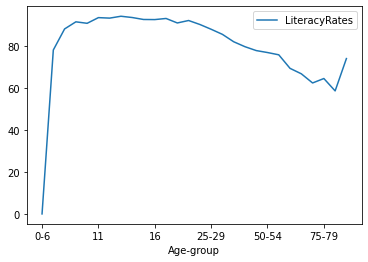

In [9]:
print('A plot showing the literacy rates of indian citizens across urban population centers.')
df_urban.plot(x='Age-group', y=['LiteracyRates'])

A plot showing the literacy rates of indian citizens across rural population centers.


<AxesSubplot:xlabel='Age-group'>

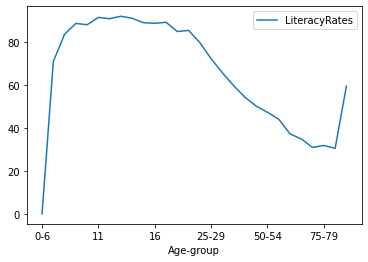

In [10]:
print('A plot showing the literacy rates of indian citizens across rural population centers.')
df_rural.plot(x='Age-group', y=['LiteracyRates'])

Text(0.5, 1.0, 'Literacy Indian citizens across urban and rural India.')

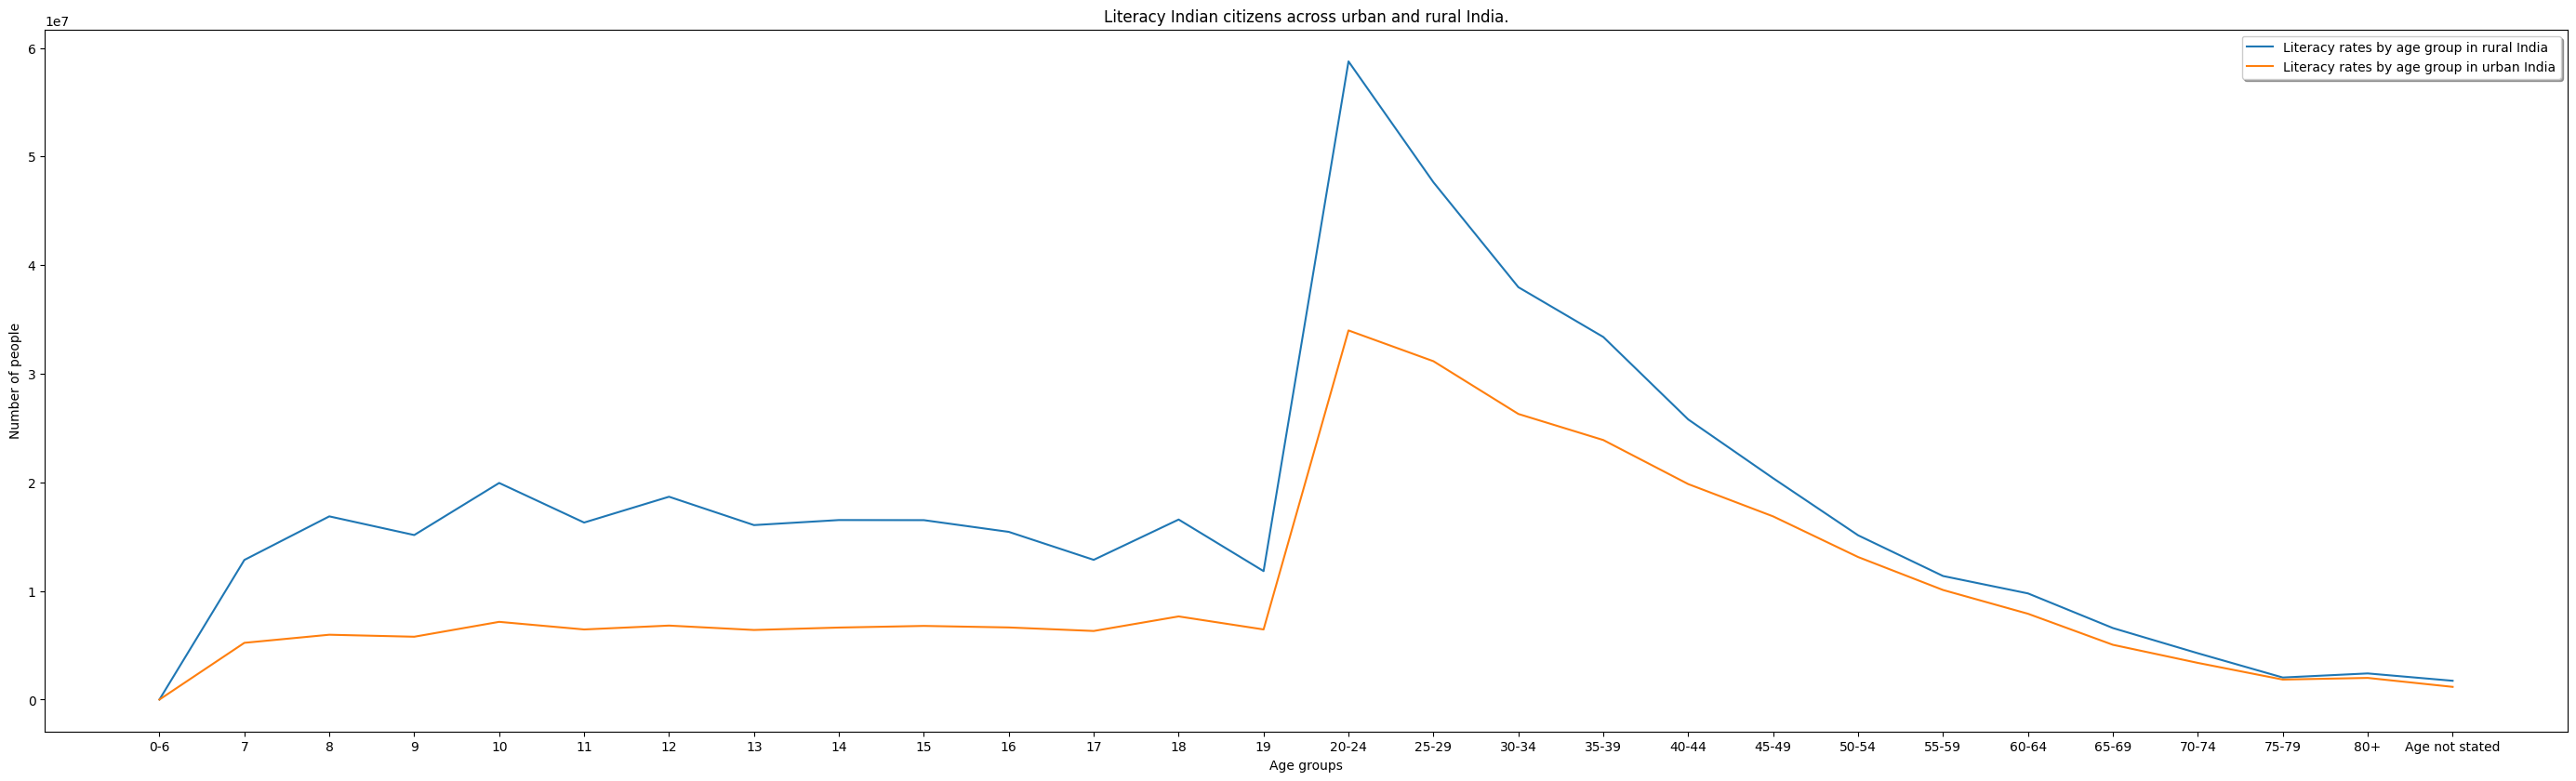

In [11]:
plt.figure(num=None, figsize=(35, 10), dpi=100)
plt.plot(df_rural['Age-group'],df_rural['Literate Persons'],label='Literacy rates by age group in rural India')
plt.plot(df_urban['Age-group'],df_urban['Literate Persons'],label='Literacy rates by age group in urban India')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.ylabel('Number of people')
plt.xlabel('Age groups')
plt.title('Literacy Indian citizens across urban and rural India.')

## A summarized picture of literacy levels of Indian citizens considering the different age levels and gender as criteria.  

In [12]:
df_india = df_india[((df_india['Total/ Rural/ Urban/'] == 'Total') & (df_india['Age-group'] != 'All ages'))]
df_india['Age-group'] = df_india['Age-group'].astype(str)

<ipython-input-12-ebff1b7cc7fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_india['Age-group'] = df_india['Age-group'].astype(str)


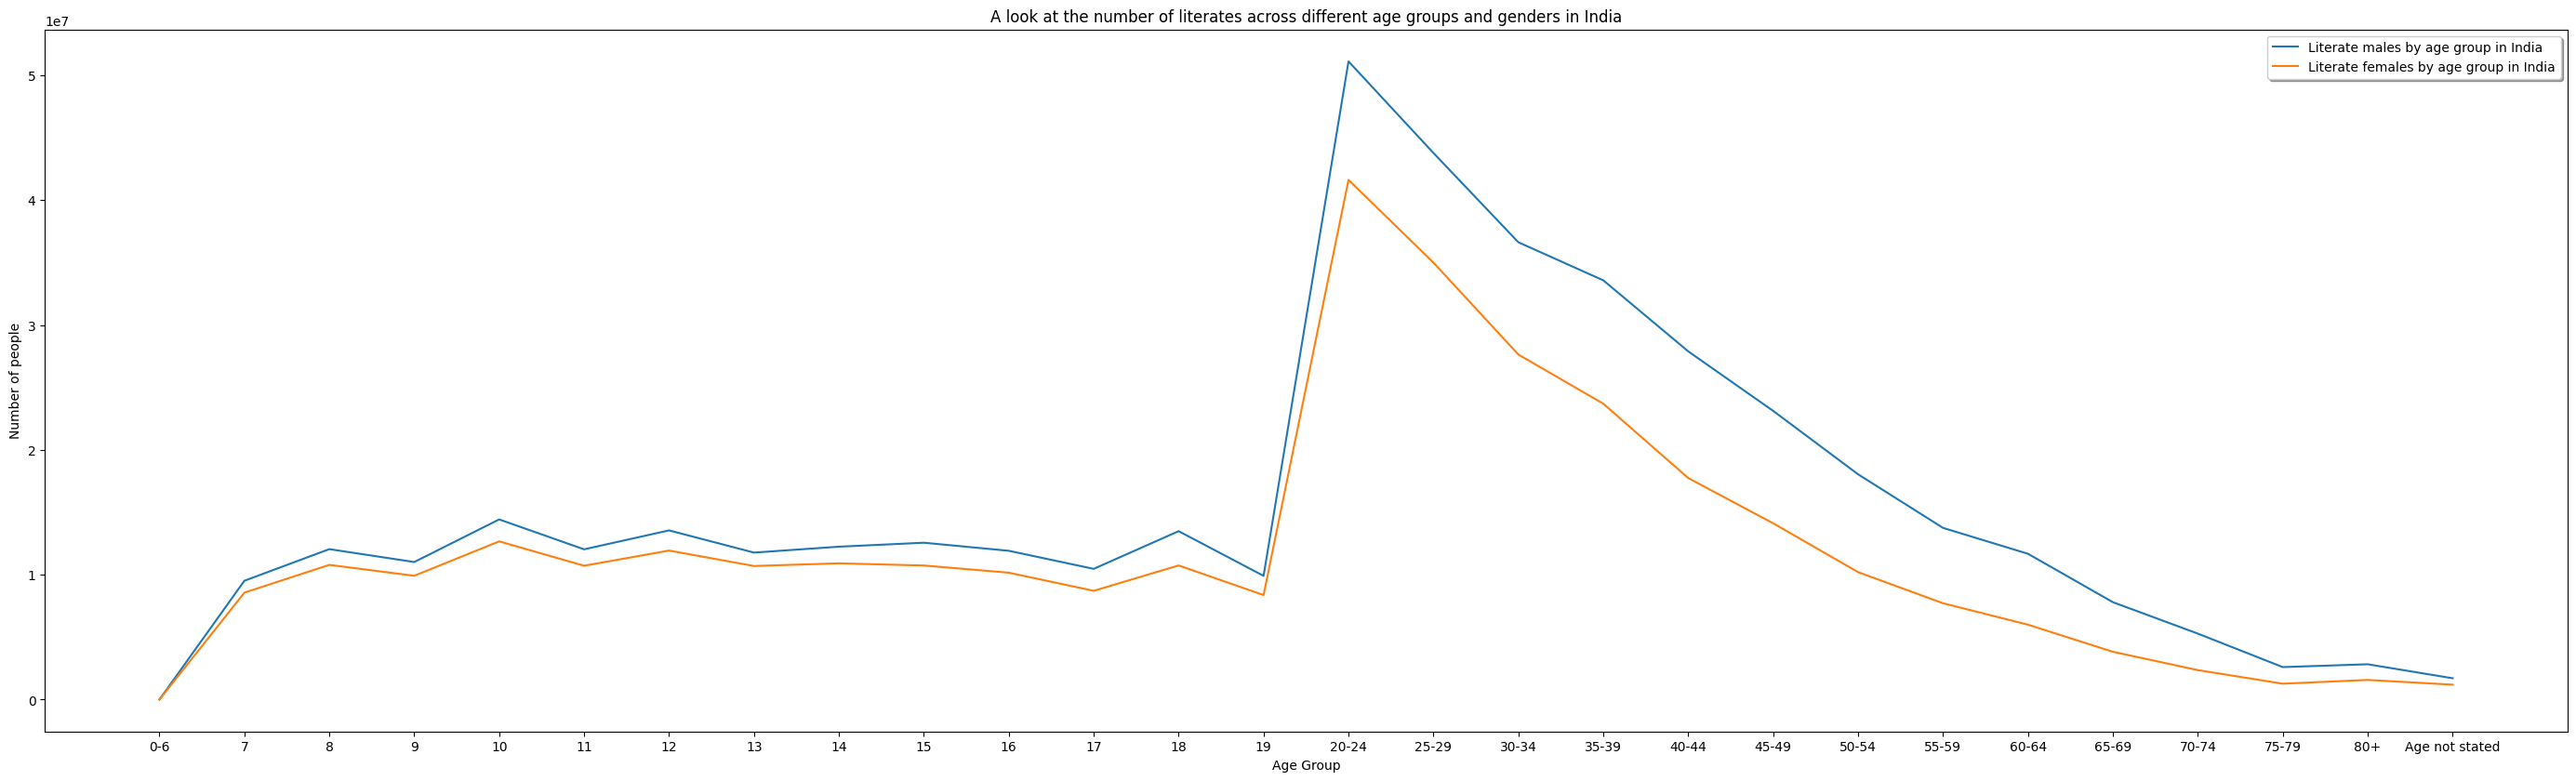

In [13]:
graphs = {
    "Literate  Males": "Literate males by age group in India",
    "Literate  Females": "Literate females by age group in India"
}
plot_multiple_graphs(df_india,'Age-group','Age Group','Number of people','A look at the number of literates across different age groups and genders in India',10,35,graphs)



## Majority of the Indian women’s complete the Matric level education.


In [14]:
cols = ['Age-group',
       '    Total  Females', 
       'Below primary  Females', 
       'Primary  Females', 
       'Middle  Females',
       'Matric/Secondary  Females',
       'Higher secondary/Intermediate Pre-University/Senior secondary  Females',
       'Non-technical diploma or certificate not equal to degree  Females',
       'Technical diploma or certificate not equal to degree   Females',
       'Graduate & above  Females',
       'Unclassified  Females']
df_women_india = df_india[cols]

# Matric level education is only applicable to age groups 15 and above, hence we can drop all rows that are less then 15 in age group
df_women_india = df_women_india.drop(labels=range(1,10), axis=0)

def get_percentage(data: DataFrame, cols, total):
    total = data[total]
    for col in cols:
        numerator = data[col].astype(float)
        percentage = (numerator/total)* 100 
        data = data.assign({'temp': percentage}, index=[str.format('{0} Percent',col)])
    return data

# To find out if majority of women have completed Matriculation at least, we need to find the percentage of women that have cleared matriculation paper which is given by (no of women completing matric / total women) * 100
total_women = df_women_india['    Total  Females']

women_matric = df_women_india['Matric/Secondary  Females']
percentage = (women_matric/total_women) * 100
df_women_india = df_women_india.assign(PercentageCompletedMatric = percentage)

women_below_primary = df_women_india['Below primary  Females']
percentage = (women_below_primary/total_women) * 100
df_women_india = df_women_india.assign(PercentageBelowPrimary = percentage)

women_primary = df_women_india['Primary  Females']
percentage = (women_primary/total_women) * 100
df_women_india = df_women_india.assign(PercentagePrimary = percentage)

women_primary = df_women_india['Middle  Females']
percentage = (women_primary/total_women) * 100
df_women_india = df_women_india.assign(PercentageMiddle = percentage)

women_primary = df_women_india['Higher secondary/Intermediate Pre-University/Senior secondary  Females']
percentage = (women_primary/total_women) * 100
df_women_india = df_women_india.assign(PercentageSSC = percentage)

women_primary = df_women_india['Non-technical diploma or certificate not equal to degree  Females']
percentage = (women_primary/total_women) * 100
df_women_india = df_women_india.assign(PercentageDiplomaNT = percentage)

women_primary = df_women_india['Technical diploma or certificate not equal to degree   Females']
percentage = (women_primary/total_women) * 100
df_women_india = df_women_india.assign(PercentageDiplomaT = percentage)

women_primary = df_women_india['Graduate & above  Females']
percentage = (women_primary/total_women) * 100
df_women_india = df_women_india.assign(PercentageGraduate = percentage)

#df_women_india = get_percentage(df_women_india,cols[1:],'    Total  Females')
df_women_india

,Age-group,Total Females,Below primary Females,Primary Females,Middle Females,Matric/Secondary Females,Higher secondary/Intermediate Pre-University/Senior secondary Females,Non-technical diploma or certificate not equal to degree Females,Technical diploma or certificate not equal to degree Females,Graduate & above Females,Unclassified Females,PercentageCompletedMatric,PercentageBelowPrimary,PercentagePrimary,PercentageMiddle,PercentageSSC,PercentageDiplomaNT,PercentageDiplomaT,PercentageGraduate
10,15,12159708,603308,2463122,4835957,2600915,0,0,0,0,27383,21.389617,4.961534,20.256424,39.770338,0.0,0.0,0.0,0.0
11,16,11564358,544529,1831077,3167501,4367677,0,0,0,0,26810,37.768435,4.708683,15.833797,27.390202,0.0,0.0,0.0,0.0
12,17,9868018,420112,1326619,1885268,4832873,0,0,0,0,23485,48.975113,4.257309,13.443622,19.104829,0.0,0.0,0.0,0.0
13,18,12937296,595424,1865835,2061496,2239427,3472586,19726,102590,0,29951,17.309854,4.602384,14.42214,15.93452,26.841668,0.152474,0.792979,0.0
14,19,10014673,441103,1381339,1452972,1403943,3221712,17178,122414,0,24240,14.01886,4.404567,13.793151,14.508432,32.169917,0.171528,1.222346,0.0
15,20-24,53839529,2618793,7869340,7339574,6146693,8803555,76240,565621,6140539,126681,11.416692,4.864071,14.616287,13.632315,16.351471,0.141606,1.050568,11.405261
16,25-29,50069757,2762619,7325521,6350650,5279910,4488162,54424,295674,6216022,117278,10.545108,5.51754,14.63063,12.683605,8.963818,0.108696,0.590524,12.414724
17,30-34,43934277,2687279,6247410,4938081,4105771,3321915,41306,182567,4229413,105090,9.345257,6.116589,14.219899,11.2397,7.561101,0.094018,0.415546,9.626682
18,35-39,42221303,2803272,5853133,4082616,3358595,2631029,35083,139863,3051411,105512,7.95474,6.639473,13.862985,9.669564,6.23152,0.083093,0.331262,7.227183
19,40-44,34892726,2450348,4581299,2880159,2409153,1764755,26383,114579,2124230,91683,6.904456,7.022518,13.129668,8.254325,5.057659,0.075612,0.328375,6.087888


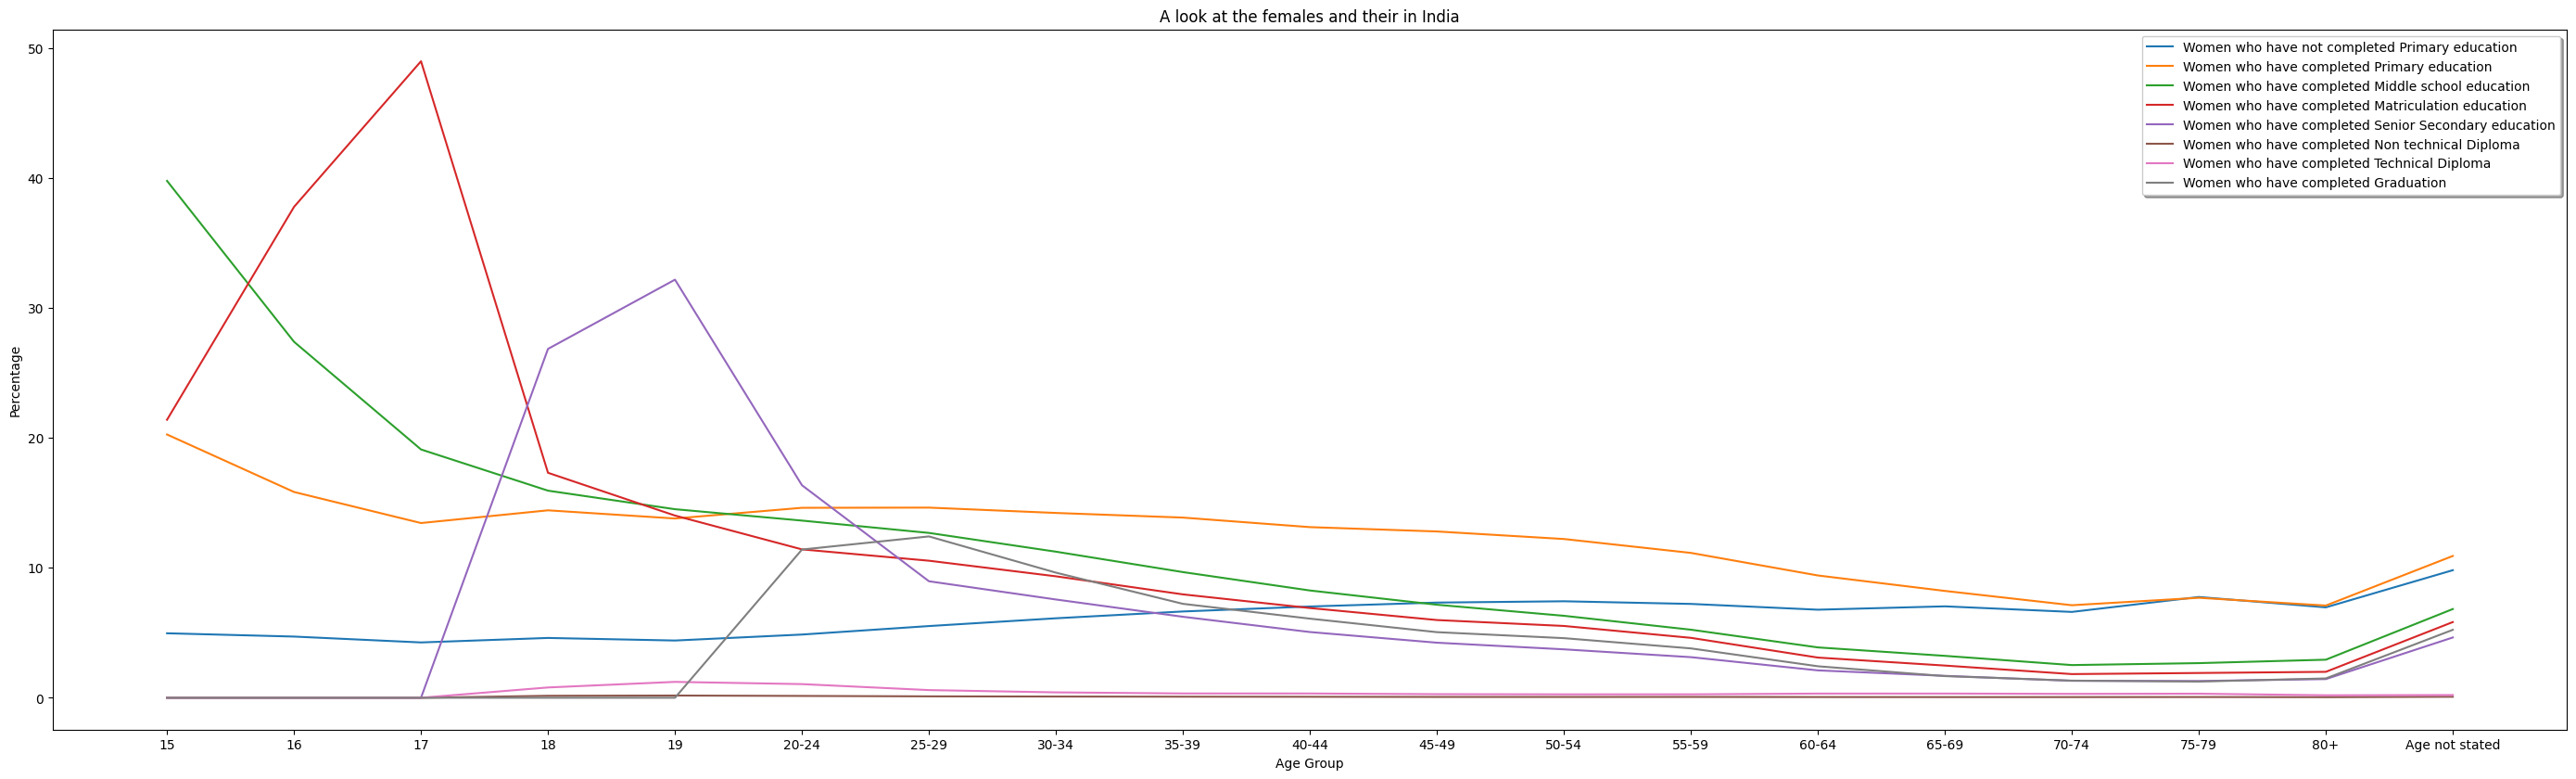

In [15]:
graphs = {    
    'PercentageBelowPrimary': 'Women who have not completed Primary education',
    'PercentagePrimary': 'Women who have completed Primary education',
    'PercentageMiddle': 'Women who have completed Middle school education',
    'PercentageCompletedMatric': 'Women who have completed Matriculation education',
    'PercentageSSC': 'Women who have completed Senior Secondary education',
    'PercentageDiplomaNT': 'Women who have completed Non technical Diploma',
    'PercentageDiplomaT': 'Women who have completed Technical Diploma',
    'PercentageGraduate': 'Women who have completed Graduation',
}

plot_multiple_graphs(df_women_india,'Age-group','Age Group','Percentage','A look at the females and their in India',10,35,graphs)

From the graph above we can easily say that majority of women have not completed their Matriculation level exams. The percentage of women who have completed matriculation stands higest at around 49% for the 16-17 age group. This means that approximately 51% women have not comploeted their Matriculation exam as of that date the data was collected/published. But there is an increase in the educatio0n level of women citizens of India as can be seen by how the graph spikes at 15-17 age group and decreases. We can infer that Matriculation exam levels are on a rise from even 3 years ago (from the date of the data).

## Illiteracy rate is high in the age level below 10

In [16]:
cols = ['Age-group','Literate Persons','Illiterate Persons','    Total Persons']
df_india_Illiteracy = df_india[cols]

# to find literacy rates, we use the formula (literate persons/total population) * 100 it is basically the percentage of the population that is literate, similarly illiteracy rate = 100 - literacy rate or (Illiterate persons/total population) * 100
total = df_india_Illiteracy['    Total Persons']

numerator = df_india_Illiteracy['Illiterate Persons']
percentage = (numerator/total) * 100
df_india_Illiteracy = df_india_Illiteracy.assign(PercentageIlliterates = percentage)

numerator = df_india_Illiteracy['Literate Persons']
percentage = (numerator/total) * 100
df_india_Illiteracy = df_india_Illiteracy.assign(PercentageLiterates = percentage)

df_india_Illiteracy.head()

,Age-group,Literate Persons,Illiterate Persons,Total Persons,PercentageIlliterates,PercentageLiterates
1,0-6,0,164515253,164515253,100.0,0.0
2,7,18078426,6748214,24826640,27.181342,72.818658
3,8,22836959,4131414,26968373,15.319478,84.680522
4,9,20932734,2491904,23424638,10.637962,89.362038
5,10,27097602,3454505,30552107,11.306929,88.693071


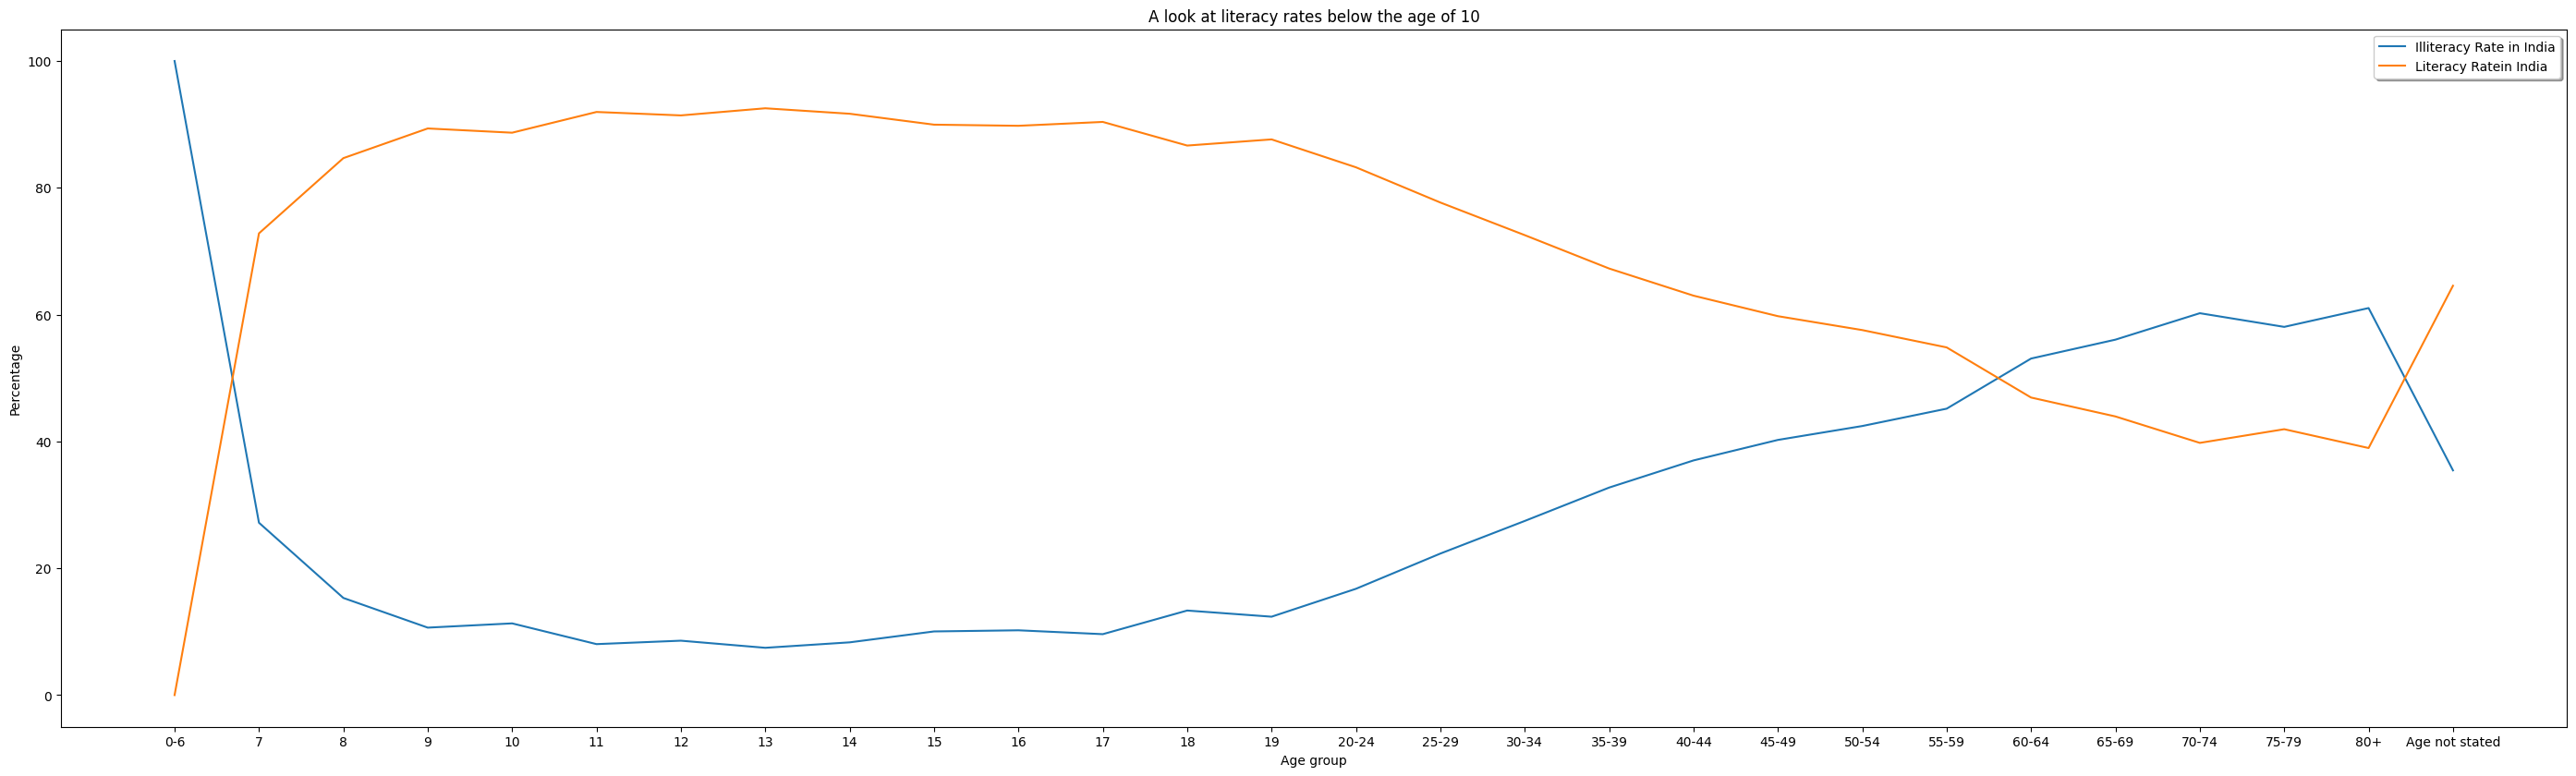

In [17]:
graphs = {
    'PercentageIlliterates': 'Illiteracy Rate in India',
    'PercentageLiterates': 'Literacy Ratein India',
}
plot_multiple_graphs(df_india_Illiteracy,'Age-group','Age group','Percentage','A look at literacy rates below the age of 10',10,35,graphs)

We can see from the above graph that Illiteracy Rate is highest at the 0-6 age group and decreases after that. It countinues its decline all the way through to the 13, 14 age groups after which it steadily climbs as we near the 80+ age group. Under age not stated category we can see that Literacy is higher.

## top 5 states where literacy rate is very high in the education levels above 10th standard

In [18]:
# Clean up and split data in smaller frames
cols = [
    'Area Name',
    'Age-group',
    '    Total Persons',
    'Higher secondary/Intermediate Pre-University/Senior secondary Persons',
    'Non-technical diploma or certificate not equal to degree Persons',
    'Technical diploma or certificate not equal to degree  Persons',
    'Graduate & above Persons'
]

states = dic_state_data.keys()

prepared_state_data = {}
for state in states:
    if state != 'INDIA':
        # Pick only desired columns
        state_data = dic_state_data.get(state)        
        state_data = state_data[cols] 
        # Since we are concerned with literacy rate we can use the all ages record 
        state_data = state_data[(state_data['Age-group'] == 'All ages')]                            
        # Sum across the columns since we care about literacy rate of the state
        state_data = state_data.assign(SumOfLiterates = state_data[['Higher secondary/Intermediate Pre-University/Senior secondary Persons', 'Non-technical diploma or certificate not equal to degree Persons', 'Technical diploma or certificate not equal to degree  Persons', 'Graduate & above Persons']].sum(axis=1))
        state_data = state_data.assign(LiteracyRate= (state_data['SumOfLiterates']/state_data['    Total Persons']) * 100) 
        prepared_state_data[state] = state_data[['LiteracyRate']].sum()[0]

prepared_state_data

{'State - JAMMU & KASHMIR': 42.11011182174189,
 'State - HIMACHAL PRADESH': 65.9390924865096,
 'State - PUNJAB': 50.28585609707103,
 'State - CHANDIGARH': 77.42092467471099,
 'State - UTTARAKHAND': 56.98377299538403,
 'State - HARYANA': 51.665424065538495,
 'State - NCT OF DELHI': 70.9706402659105,
 'State - RAJASTHAN': 31.815733107253944,
 'State - UTTAR PRADESH': 38.49250865730814,
 'State - BIHAR': 30.21520919269606,
 'State - SIKKIM': 41.62563649709743,
 'State - ARUNACHAL PRADESH': 35.16487039268599,
 'State - NAGALAND': 35.178855287762886,
 'State - MANIPUR': 53.826174605184676,
 'State - MIZORAM': 32.499694409668265,
 'State - TRIPURA': 41.483895879179514,
 'State - MEGHALAYA': 32.85480200791069,
 'State - ASSAM': 48.06415978563969,
 'State - WEST BENGAL': 40.0518442849577,
 'State - JHARKHAND': 34.7211017688179,
 'State - ODISHA': 37.56197045089624,
 'State - CHHATTISGARH': 34.707036466559224,
 'State - MADHYA PRADESH': 34.327291788416865,
 'State - GUJARAT': 36.67027365905628,

Text(0.5, 1.0, 'Literacy Rates across states in india')

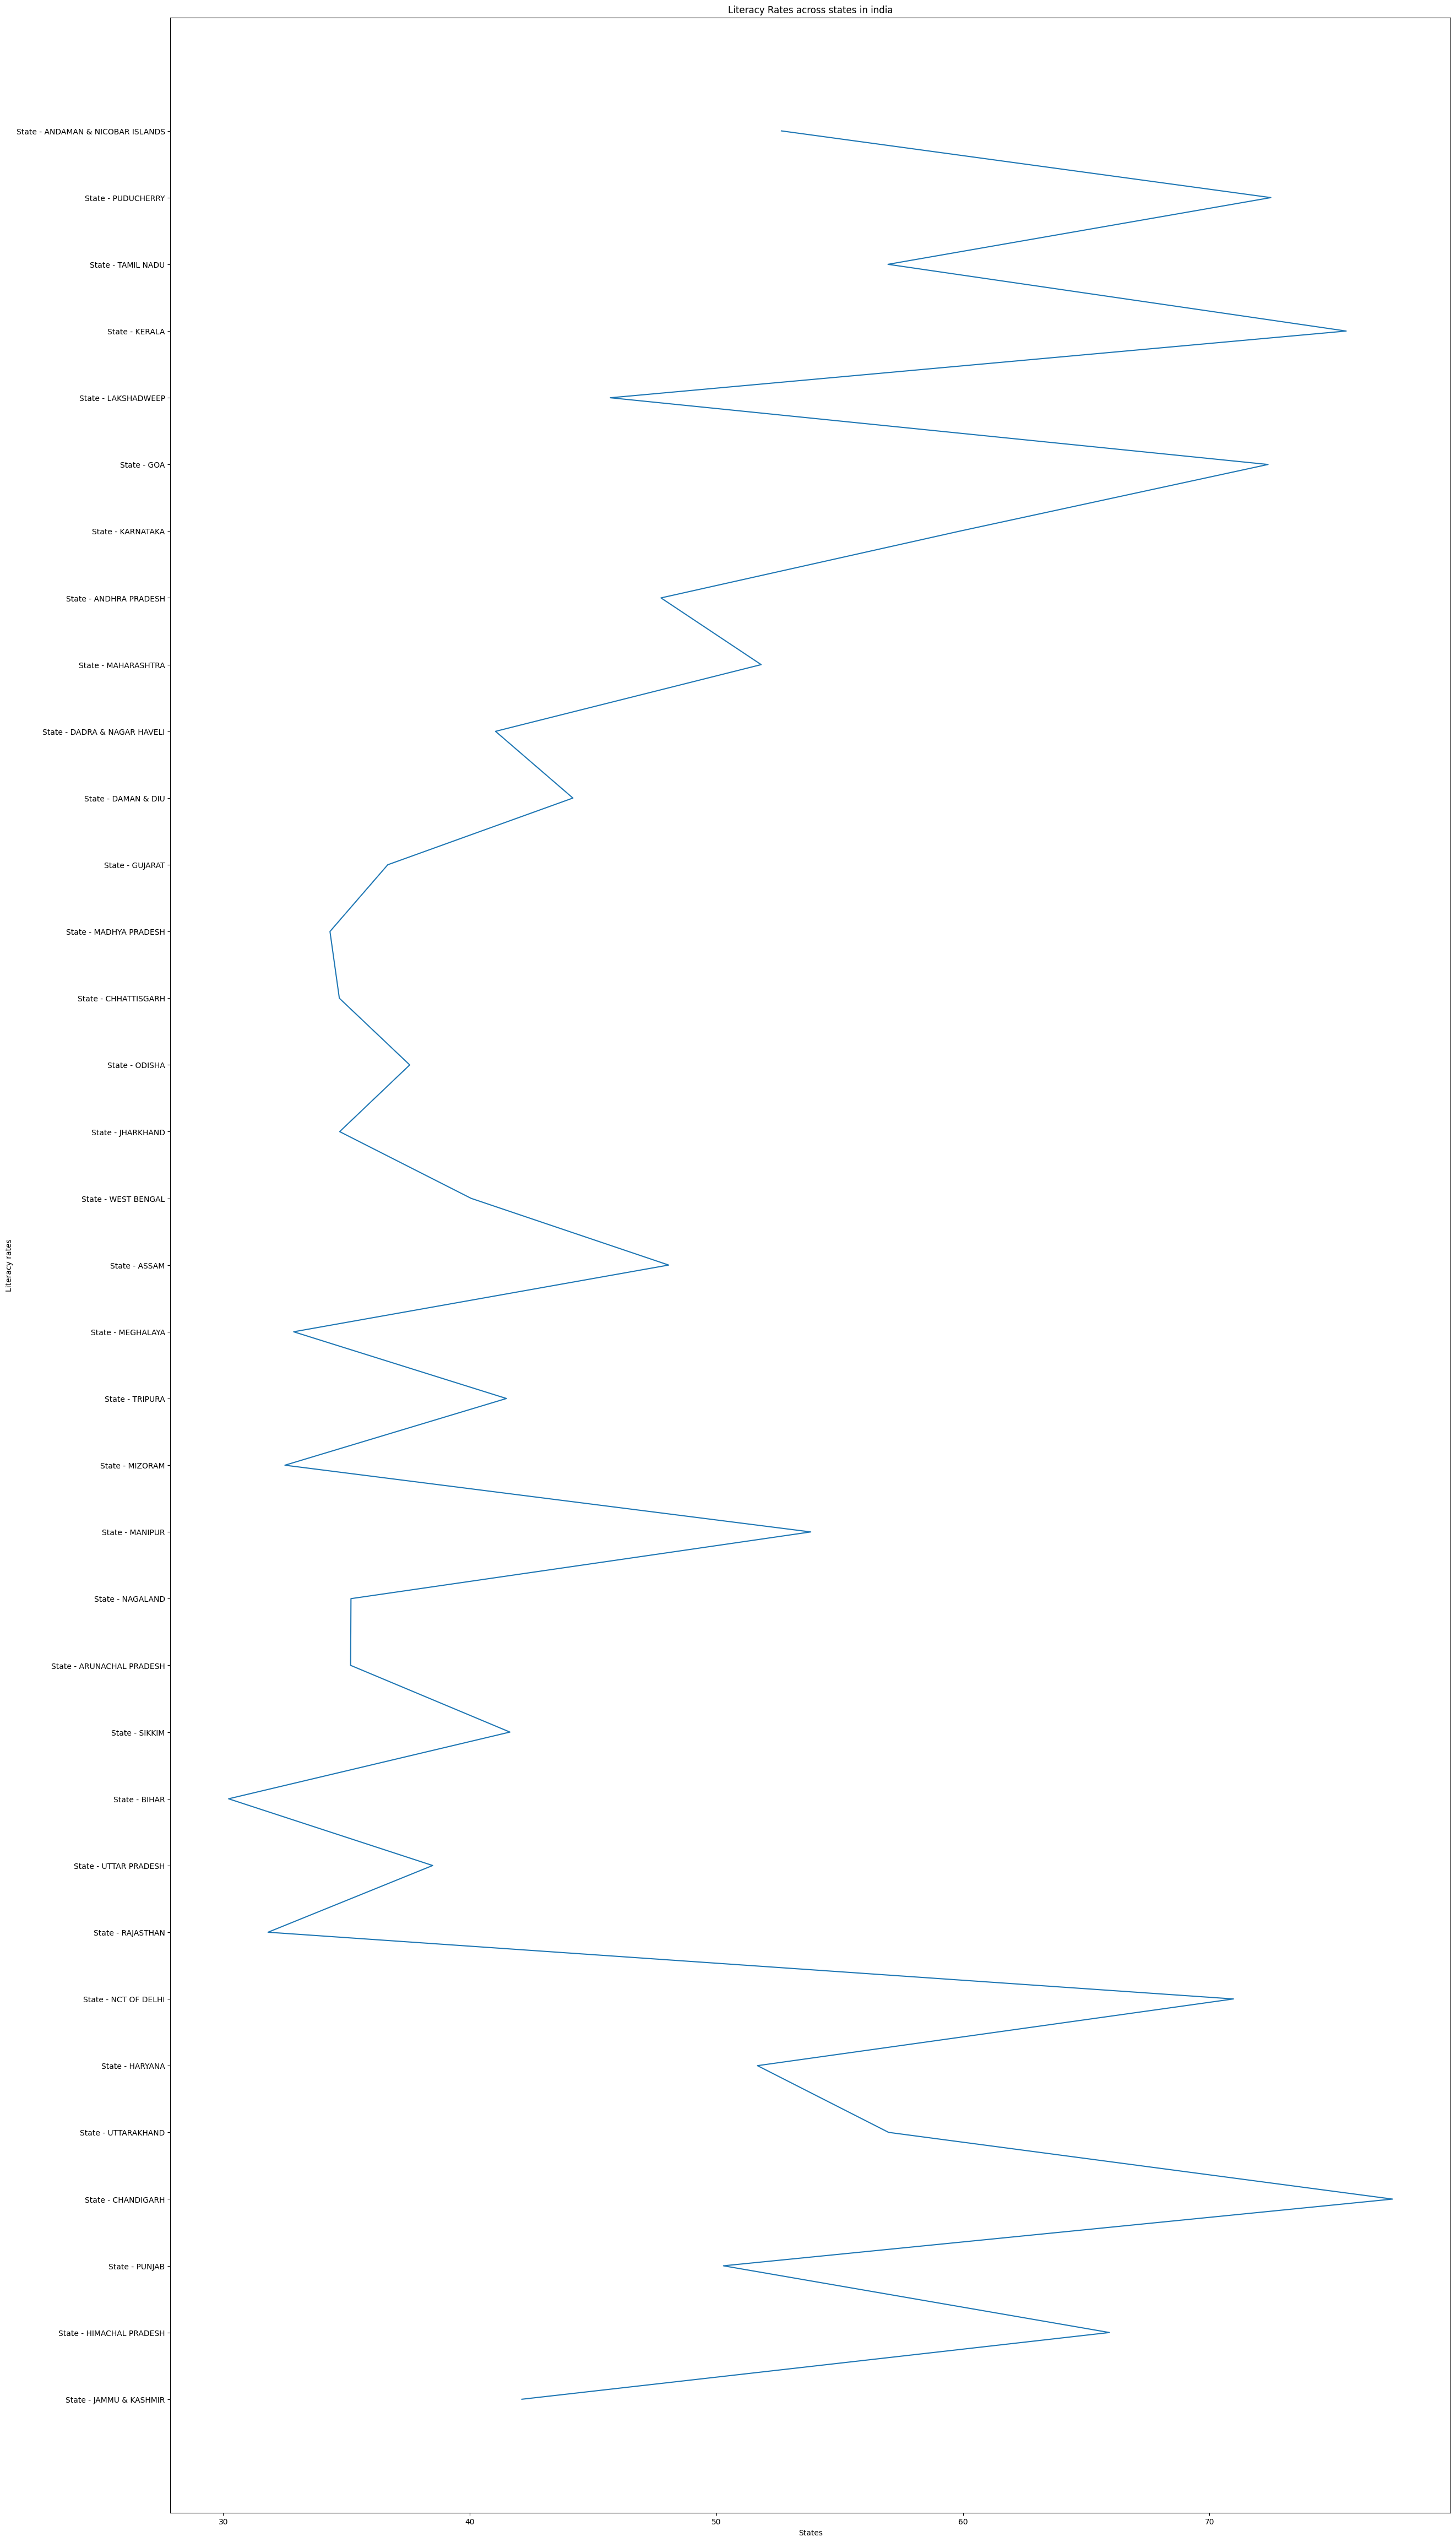

In [19]:
plt.figure(num=None, figsize=(30, 60), dpi=100)
plt.plot(prepared_state_data.values(),prepared_state_data.keys(),label='Literacy rates across states')
plt.ylabel('Literacy rates')
plt.xlabel('States')
plt.title('Literacy Rates across states in india')

In [20]:
import operator

# Sort dictionary based on literacy rate
top_5_literate_states = sorted(prepared_state_data.items(), key=operator.itemgetter(1), reverse=True)[:5]

print('The top 5 literarte staes are: ')
i = 0
for state in top_5_literate_states:
    print(str.format('{0}. {1}', i, state))
    i += 1

The top 5 literarte staes are: 
0. ('State - CHANDIGARH', 77.42092467471099)
1. ('State - KERALA', 75.54198666703087)
2. ('State - PUDUCHERRY', 72.48600281776746)
3. ('State - GOA', 72.37178826263036)
4. ('State - NCT OF DELHI', 70.9706402659105)


## In the state of Haryana, girl education is not encouraged

In [21]:
df_haryana = dic_state_data.get('State - HARYANA')
df_haryana['Age-group'] = df_haryana['Age-group'].astype(str)

df_haryana = df_haryana[((df_haryana['Total/ Rural/ Urban/'] == 'Total') & (df_haryana['Age-group'] != 'All ages'))]

# We need to consider Male & Female education across all levels of education
cols_females = ['Age-group',
       '    Total  Females', 
       'Below primary  Females', 
       'Primary  Females', 
       'Middle  Females',
       'Matric/Secondary  Females',
       'Higher secondary/Intermediate Pre-University/Senior secondary  Females',
       'Non-technical diploma or certificate not equal to degree  Females',
       'Technical diploma or certificate not equal to degree   Females',
       'Graduate & above  Females',
       'Unclassified  Females']
df_haryana_females = df_haryana[cols_females]
cols_males = ['Age-group',
       '    Total  Males', 
       'Below primary  Males', 
       'Primary  Males', 
       'Middle  Males',
       'Matric/Secondary  Males',
       'Higher secondary/Intermediate Pre-University/Senior secondary  Males',
       'Non-technical diploma or certificate not equal to degree  Males',
       'Technical diploma or certificate not equal to degree   Males',
       'Graduate & above  Males',
       'Unclassified  Males',
       ]
df_haryana_males = df_haryana[cols_males]

def find_literacy_rate(data: DataFrame, total_column):    
    # Sum across the columns since we care about literacy rate of the state
    cols_sum = data.columns[2:]    
    sumOfLiterates = data[cols_sum].sum(axis=1)
    literacy_rates = (sumOfLiterates/data[total_column]) * 100
    data = data.assign(LiteracyRates = literacy_rates)
    data['LietracyRates'] = pd.to_numeric(data['LiteracyRates'])
    return data  

df_haryana_males = find_literacy_rate(df_haryana_males, '    Total  Males')
df_haryana_females = find_literacy_rate(df_haryana_females, '    Total  Females')

df_haryana_males.head()

<ipython-input-21-0732e456f890>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_haryana['Age-group'] = df_haryana['Age-group'].astype(str)


,Age-group,Total Males,Below primary Males,Primary Males,Middle Males,Matric/Secondary Males,Higher secondary/Intermediate Pre-University/Senior secondary Males,Non-technical diploma or certificate not equal to degree Males,Technical diploma or certificate not equal to degree Males,Graduate & above Males,Unclassified Males,LiteracyRates,LietracyRates
523,0-6,1843109,0,0,0,0,0,0,0,0,0,0.0,0.000000
524,7,270994,212296,0,0,0,0,0,0,0,1278,78.811339,78.811339
525,8,281655,250189,0,0,0,0,0,0,0,716,89.082388,89.082388
526,9,259856,221572,17730,0,0,0,0,0,0,422,92.252632,92.252632
527,10,320318,216183,77293,0,0,0,0,0,0,443,91.758502,91.758502


Text(0.5, 1.0, 'Literacy Rates of citizens in Haryana, India.')

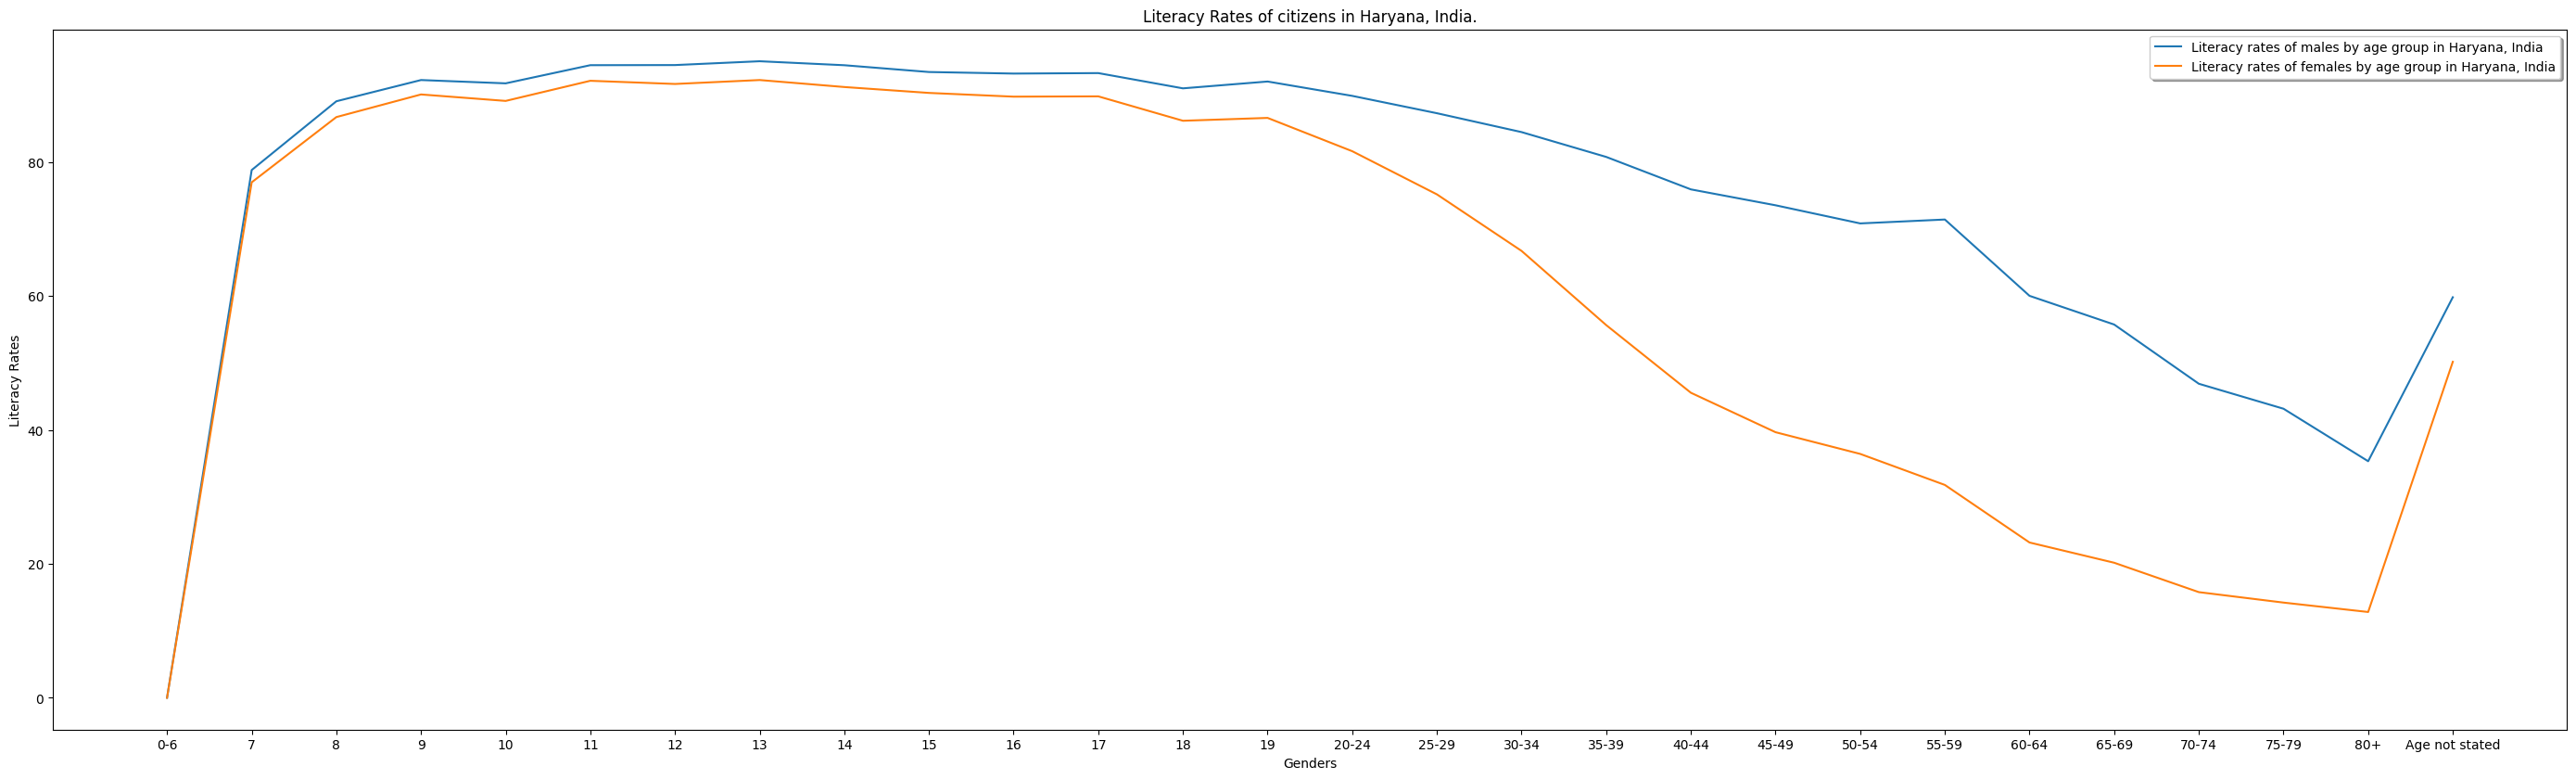

In [22]:
plt.figure(num=None, figsize=(35, 10), dpi=100)
plt.plot(df_haryana_males['Age-group'],df_haryana_males['LiteracyRates'],label='Literacy rates of males by age group in Haryana, India')
plt.plot(df_haryana_females['Age-group'],df_haryana_females['LiteracyRates'],label='Literacy rates of females by age group in Haryana, India')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.ylabel('Literacy Rates')
plt.xlabel('Genders')
plt.title('Literacy Rates of citizens in Haryana, India.') 

It can be seen from the above plot that literacy rates of Haryanvi females have been, historically, lower than that of Haryanvi males. The age groups 6 onwards shows a trend of female and male literacy rates matching up but falls agains as we move up the age groups axis. The biggest discrepancies are seen in the ages bewteen 59 to 65. Hence we can say that female education is not encouraged in Haryana as much male education is. This trend is on the decline since we do see that 0-6 age groups have similar literacy rates. 